## Model Training

#### 1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library and the required model parameters.

In [498]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, Ridge,Lasso
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, f1_score, confusion_matrix, log_loss, jaccard_score
from sklearn.model_selection import RandomizedSearchCV,train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.compose import ColumnTransformer
import warnings

#### Import the CSV Data as Pandas DataFrame

In [499]:
df = pd.read_csv('data/data_set.csv')

#### Show Top 5 Records

In [500]:
df.head()

,ID,Country,Age,Gender,Tobacco Use,Alcohol Consumption,HPV Infection,Betel Quid Use,Chronic Sun Exposure,Poor Oral Hygiene,...,Difficulty Swallowing,White or Red Patches in Mouth,Tumor Size (cm),Cancer Stage,Treatment Type,"Survival Rate (5-Year, %)",Cost of Treatment (USD),Economic Burden (Lost Workdays per Year),Early Diagnosis,Oral Cancer (Diagnosis)
0,1,Italy,36,Female,Yes,Yes,Yes,No,No,Yes,...,No,No,0.000000,0,No Treatment,100.000000,0.00,0,No,No
1,2,Japan,64,Male,Yes,Yes,Yes,No,Yes,Yes,...,No,No,1.782186,1,No Treatment,83.340103,77772.50,177,No,Yes
2,3,UK,37,Female,No,Yes,No,No,Yes,Yes,...,No,Yes,3.523895,2,Surgery,63.222871,101164.50,130,Yes,Yes
3,4,Sri Lanka,55,Male,Yes,Yes,No,Yes,No,Yes,...,No,No,0.000000,0,No Treatment,100.000000,0.00,0,Yes,No
4,5,South Africa,68,Male,No,No,No,No,No,Yes,...,No,No,2.834789,3,No Treatment,44.293199,45354.75,52,No,Yes


#### Preparing X(Dataframe without target variable) and Y(Dataframe with only target variable) variables

In [501]:
X = df.drop(columns=['Oral Cancer (Diagnosis)'],axis=1)

In [502]:
X.head()

,ID,Country,Age,Gender,Tobacco Use,Alcohol Consumption,HPV Infection,Betel Quid Use,Chronic Sun Exposure,Poor Oral Hygiene,...,Unexplained Bleeding,Difficulty Swallowing,White or Red Patches in Mouth,Tumor Size (cm),Cancer Stage,Treatment Type,"Survival Rate (5-Year, %)",Cost of Treatment (USD),Economic Burden (Lost Workdays per Year),Early Diagnosis
0,1,Italy,36,Female,Yes,Yes,Yes,No,No,Yes,...,No,No,No,0.000000,0,No Treatment,100.000000,0.00,0,No
1,2,Japan,64,Male,Yes,Yes,Yes,No,Yes,Yes,...,Yes,No,No,1.782186,1,No Treatment,83.340103,77772.50,177,No
2,3,UK,37,Female,No,Yes,No,No,Yes,Yes,...,No,No,Yes,3.523895,2,Surgery,63.222871,101164.50,130,Yes
3,4,Sri Lanka,55,Male,Yes,Yes,No,Yes,No,Yes,...,No,No,No,0.000000,0,No Treatment,100.000000,0.00,0,Yes
4,5,South Africa,68,Male,No,No,No,No,No,Yes,...,No,No,No,2.834789,3,No Treatment,44.293199,45354.75,52,No


In [503]:
Y = df.iloc[:, [-1]]

In [504]:
Y.head()

,Oral Cancer (Diagnosis)
0,No
1,Yes
2,Yes
3,No
4,Yes


#### Performing Label encoding on categorical columns and feature scaling (It ensures that all features contribute equally to model training by transforming them to a similar scale) on numerical dataset.

In [505]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns


numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()
# label_transformer = LabelEncoder()#LabelEncoder cannot be used here.

preprocessor = ColumnTransformer(
    [
        # ("LabelEncoder", label_transformer, cat_features), We cannot use this inside a column transformer
         ("One Hot Encoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features)     
    ]
)

In [506]:
X = preprocessor.fit_transform(X)

In [507]:
X.shape

(84922, 60)

In [508]:
# Apply LabelEncoder to each categorical column
label_transformers = {col: LabelEncoder() for col in Y.columns}

# Encode categorical features using LabelEncoder
for col, encoder in label_transformers.items():
    Y[col] = encoder.fit_transform(Y[col])

/var/folders/f2/9d06r3312h991yzd3dgphlch0000gn/T/ipykernel_5691/1566566491.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y[col] = encoder.fit_transform(Y[col])


In [509]:
Y.shape

(84922, 1)

In [510]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((67937, 60), (16985, 60))

#### Create an Evaluate Function to give all metrics after model Training

In [511]:
def evaluate_model(true, predicted):
    f1 = f1_score(true, predicted)
    # conf_matrix = confusion_matrix(true, predicted)
    accuracy = accuracy_score(true, predicted) * 100
    return f1, accuracy

#### Training and evaluating the model results

In [512]:
models = {
    "Logistic Regression": LogisticRegression(),
    # "Lasso": Lasso(), We cannot use this when we have both binary(one hot encoded data) and continous data in our data
    # "Ridge": Ridge(), We cannot use this when we have both binary(one hot encoded data) and continous data in our data
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine": SVC(),
    "XGBClassifier": XGBClassifier(), 
    "CatBoosting Classifier": CatBoostClassifier(verbose=False),
    "AdaBoostClassifier": AdaBoostClassifier(),
    "Naive Bayes": GaussianNB()
    
    
    
    
    
   
}
model_list = []
accuracy = []
f1_score_list = []
auc_roc_score = []
log_loss_score = []
jaccard_score_list = []
conf_matrices = {}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, Y_train) # Train the model with X_train(Training data set excluding Target Variable)
    # and y_Train which is target variable

    # Make predictions
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)
    Y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else Y_test_pred #Uses sigmoid_function and decision tree to calculate the probability.
    # Evaluate Train and Test dataset
    model_train_f1 , model_train_accuracy = evaluate_model(Y_train, Y_train_pred)

    model_test_f1 , model_test_accuracy = evaluate_model(Y_test, Y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- F1 score: {:.4f}".format(model_train_f1))
    print("- Accuracy Score: {:.4f}".format(model_train_accuracy))
    

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- F1 score: {:.4f}".format(model_test_f1))
    print("- Accuracy Score: {:.4f}".format(model_test_accuracy))
    print("- AUC ROC Score: {:.2f}".format(roc_auc_score(Y_test, Y_prob)))
    print("- Log loss: {:.2f}".format(log_loss(Y_test, Y_prob)))
    print("- Jaccard Score: {:.2f}".format(jaccard_score(Y_test, Y_test_pred)))
    print(classification_report(Y_test, Y_test_pred))
    accuracy.append(model_test_accuracy)
    f1_score_list.append(model_test_f1)
    auc_roc_score.append("{:.2f}".format(roc_auc_score(Y_test, Y_prob)))
    log_loss_score.append("{:.2f}".format(log_loss(Y_test, Y_prob)))
    jaccard_score_list.append("{:.2f}".format(jaccard_score(Y_test, Y_test_pred)))
    conf_matrices[model_list[i]] = confusion_matrix(Y_test, Y_test_pred)
    print("-" * 50)
    print('\n')

/Users/kasish/Desktop/ML_PROJECT_LOGGING/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic Regression
Model performance for Training set
- F1 score: 1.0000
- Accuracy Score: 100.0000
----------------------------------
Model performance for Test set
- F1 score: 1.0000
- Accuracy Score: 100.0000
- AUC ROC Score: 1.00
- Log loss: 0.00
- Jaccard Score: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8560
           1       1.00      1.00      1.00      8425

    accuracy                           1.00     16985
   macro avg       1.00      1.00      1.00     16985
weighted avg       1.00      1.00      1.00     16985

--------------------------------------------------




/Users/kasish/Desktop/ML_PROJECT_LOGGING/venv/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


K-Nearest Neighbors
Model performance for Training set
- F1 score: 0.9991
- Accuracy Score: 99.9146
----------------------------------
Model performance for Test set
- F1 score: 0.9989
- Accuracy Score: 99.8940
- AUC ROC Score: 1.00
- Log loss: 0.01
- Jaccard Score: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8560
           1       1.00      1.00      1.00      8425

    accuracy                           1.00     16985
   macro avg       1.00      1.00      1.00     16985
weighted avg       1.00      1.00      1.00     16985

--------------------------------------------------


Decision Tree
Model performance for Training set
- F1 score: 1.0000
- Accuracy Score: 100.0000
----------------------------------
Model performance for Test set
- F1 score: 1.0000
- Accuracy Score: 100.0000
- AUC ROC Score: 1.00
- Log loss: 0.00
- Jaccard Score: 1.00
              precision    recall  f1-score   support

           0       1.00  

/Users/kasish/Desktop/ML_PROJECT_LOGGING/venv/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest
Model performance for Training set
- F1 score: 1.0000
- Accuracy Score: 100.0000
----------------------------------
Model performance for Test set
- F1 score: 1.0000
- Accuracy Score: 100.0000
- AUC ROC Score: 1.00
- Log loss: 0.00
- Jaccard Score: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8560
           1       1.00      1.00      1.00      8425

    accuracy                           1.00     16985
   macro avg       1.00      1.00      1.00     16985
weighted avg       1.00      1.00      1.00     16985

--------------------------------------------------




/Users/kasish/Desktop/ML_PROJECT_LOGGING/venv/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boosting
Model performance for Training set
- F1 score: 1.0000
- Accuracy Score: 100.0000
----------------------------------
Model performance for Test set
- F1 score: 1.0000
- Accuracy Score: 100.0000
- AUC ROC Score: 1.00
- Log loss: 0.00
- Jaccard Score: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8560
           1       1.00      1.00      1.00      8425

    accuracy                           1.00     16985
   macro avg       1.00      1.00      1.00     16985
weighted avg       1.00      1.00      1.00     16985

--------------------------------------------------




/Users/kasish/Desktop/ML_PROJECT_LOGGING/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Support Vector Machine
Model performance for Training set
- F1 score: 1.0000
- Accuracy Score: 100.0000
----------------------------------
Model performance for Test set
- F1 score: 1.0000
- Accuracy Score: 100.0000
- AUC ROC Score: 1.00
- Log loss: 0.00
- Jaccard Score: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8560
           1       1.00      1.00      1.00      8425

    accuracy                           1.00     16985
   macro avg       1.00      1.00      1.00     16985
weighted avg       1.00      1.00      1.00     16985

--------------------------------------------------


XGBClassifier
Model performance for Training set
- F1 score: 1.0000
- Accuracy Score: 100.0000
----------------------------------
Model performance for Test set
- F1 score: 1.0000
- Accuracy Score: 100.0000
- AUC ROC Score: 1.00
- Log loss: 0.00
- Jaccard Score: 1.00
              precision    recall  f1-score   support

           0       1

/Users/kasish/Desktop/ML_PROJECT_LOGGING/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kasish/Desktop/ML_PROJECT_LOGGING/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Naive Bayes
Model performance for Training set
- F1 score: 1.0000
- Accuracy Score: 100.0000
----------------------------------
Model performance for Test set
- F1 score: 1.0000
- Accuracy Score: 100.0000
- AUC ROC Score: 1.00
- Log loss: 0.00
- Jaccard Score: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8560
           1       1.00      1.00      1.00      8425

    accuracy                           1.00     16985
   macro avg       1.00      1.00      1.00     16985
weighted avg       1.00      1.00      1.00     16985

--------------------------------------------------




### Results

In [513]:
pd.DataFrame(list(zip(model_list, accuracy)), columns=['Model Name', 'Accuracy']).sort_values(by=["Accuracy"],ascending=False)

,Model Name,Accuracy
0,Logistic Regression,100.000000
2,Decision Tree,100.000000
3,Random Forest,100.000000
4,Gradient Boosting,100.000000
5,Support Vector Machine,100.000000
6,XGBClassifier,100.000000
7,CatBoosting Classifier,100.000000
8,AdaBoostClassifier,100.000000
9,Naive Bayes,100.000000
1,K-Nearest Neighbors,99.894024


#### Displaying metrics of all the models

In [514]:
# Display accuracy of all models
results_df = pd.DataFrame({
    'Model': model_list,
    'Accuracy (%)': accuracy,
    'AUC-ROC': auc_roc_score,
    'F1 Score': f1_score_list,
    'Log loss': log_loss_score,
    'Jaccard score': jaccard_score_list
}).sort_values(by='Accuracy (%)', ascending=False)
print(results_df)

                    Model  Accuracy (%) AUC-ROC  F1 Score Log loss  \
0     Logistic Regression    100.000000    1.00  1.000000     0.00   
2           Decision Tree    100.000000    1.00  1.000000     0.00   
3           Random Forest    100.000000    1.00  1.000000     0.00   
4       Gradient Boosting    100.000000    1.00  1.000000     0.00   
5  Support Vector Machine    100.000000    1.00  1.000000     0.00   
6           XGBClassifier    100.000000    1.00  1.000000     0.00   
7  CatBoosting Classifier    100.000000    1.00  1.000000     0.00   
8      AdaBoostClassifier    100.000000    1.00  1.000000     0.00   
9             Naive Bayes    100.000000    1.00  1.000000     0.00   
1     K-Nearest Neighbors     99.894024    1.00  0.998931     0.01   

  Jaccard score  
0          1.00  
2          1.00  
3          1.00  
4          1.00  
5          1.00  
6          1.00  
7          1.00  
8          1.00  
9          1.00  
1          1.00  


## Visualising accuracy of all the models

/var/folders/f2/9d06r3312h991yzd3dgphlch0000gn/T/ipykernel_5691/2525919095.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy (%)', y='Model', data=results_df, palette='viridis')


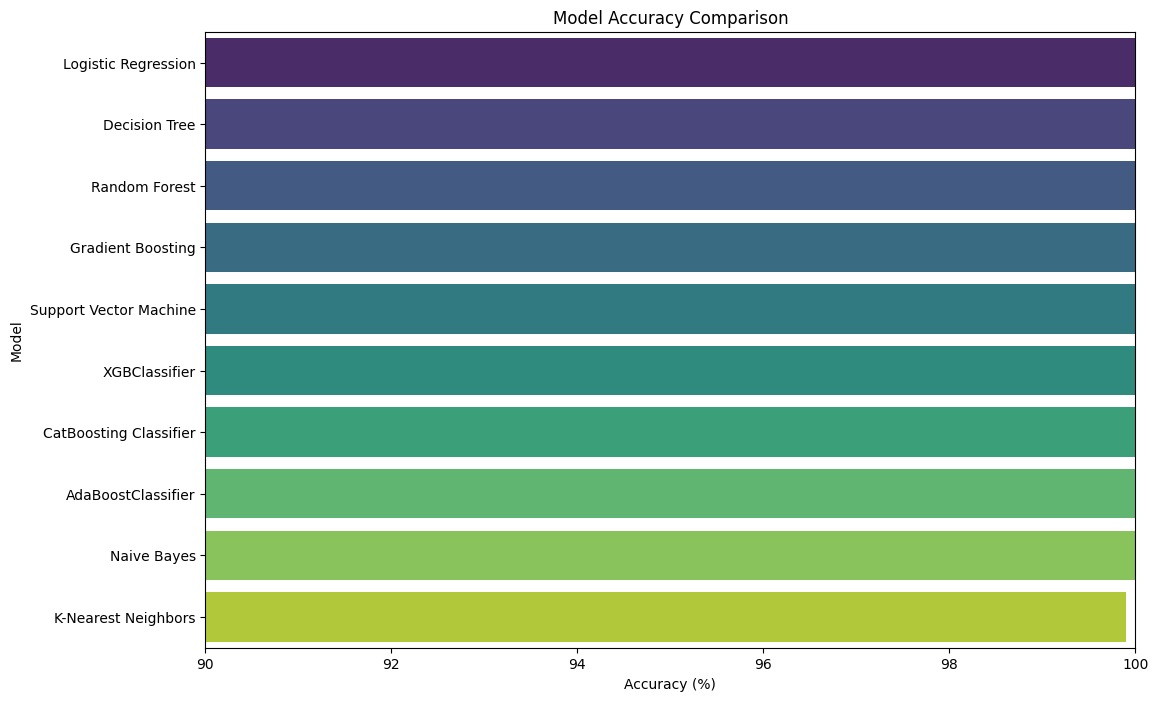

In [515]:
# Visualize accuracy
plt.figure(figsize=(12, 8))
sns.barplot(x='Accuracy (%)', y='Model', data=results_df, palette='viridis')
plt.xlabel('Accuracy (%)')
plt.ylabel('Model')
plt.title('Model Accuracy Comparison')
plt.xlim(90, 100)
plt.show()

## Visualising auc-roc scores of all the models

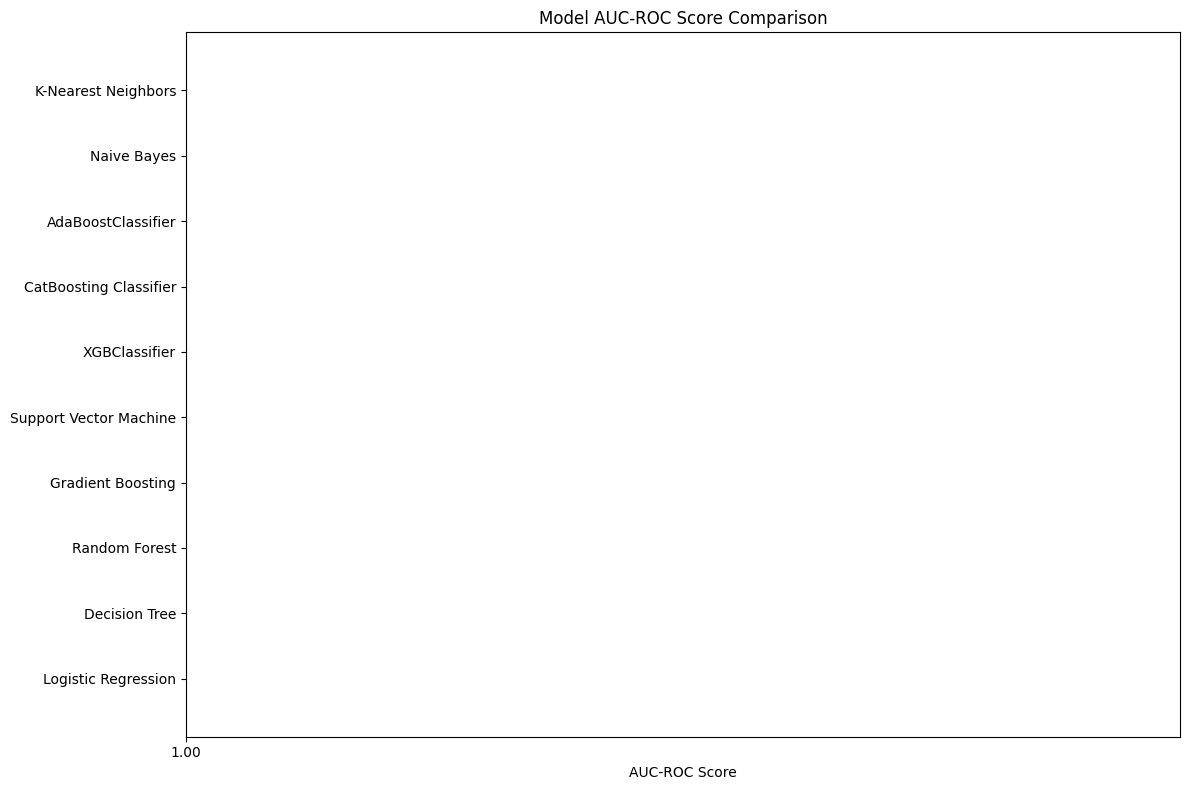

In [516]:
# Visualize AUC-ROC Scores
plt.figure(figsize=(12, 8))
plt.barh(results_df['Model'], results_df['AUC-ROC'], color='teal')
plt.xlabel('AUC-ROC Score')
plt.title('Model AUC-ROC Score Comparison')
plt.xlim(0, 1)
plt.grid(axis='x')
plt.tight_layout()
plt.show() #As all the auc-roc scores are 1 we are not seeing the clear graph


## Visualising F1 scores of all the models

/var/folders/f2/9d06r3312h991yzd3dgphlch0000gn/T/ipykernel_5691/1399173037.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='F1 Score', y='Model', data=results_df, palette='magma')


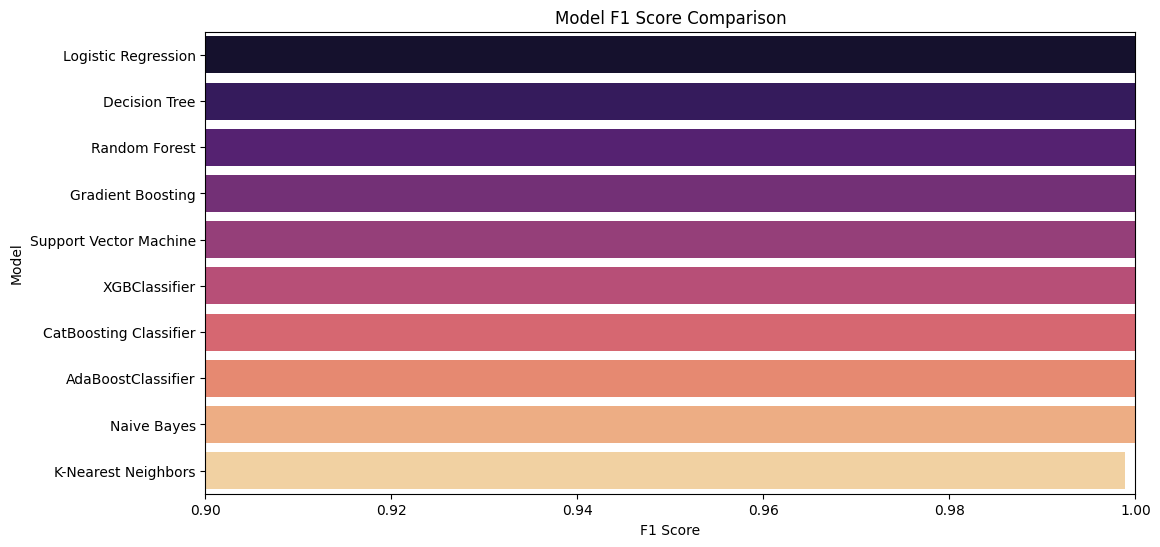

In [517]:
# Visualize F1 Scores
plt.figure(figsize=(12, 6))
sns.barplot(x='F1 Score', y='Model', data=results_df, palette='magma')
plt.xlabel('F1 Score')
plt.ylabel('Model')
plt.title('Model F1 Score Comparison')
plt.xlim(0.9, 1)
plt.show()

## Visualising Log loss of all the models

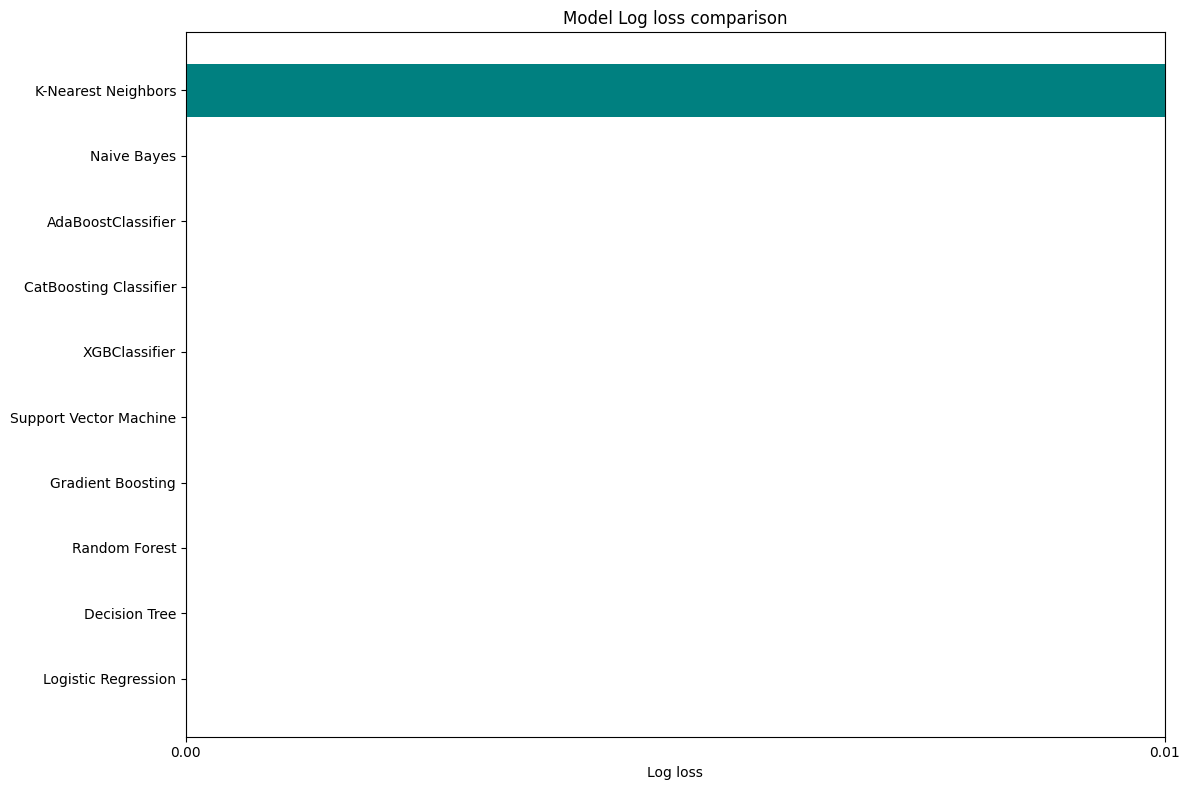

In [518]:
# Visualize Log loss Scores
plt.figure(figsize=(12, 8))
plt.barh(results_df['Model'], results_df['Log loss'], color='teal')
plt.xlabel('Log loss')
plt.title('Model Log loss comparison')
plt.xlim(0, 1)
plt.grid(axis='x')
plt.tight_layout()
plt.show() #Log loss of all the models

## Visualising jaccard score of all the models

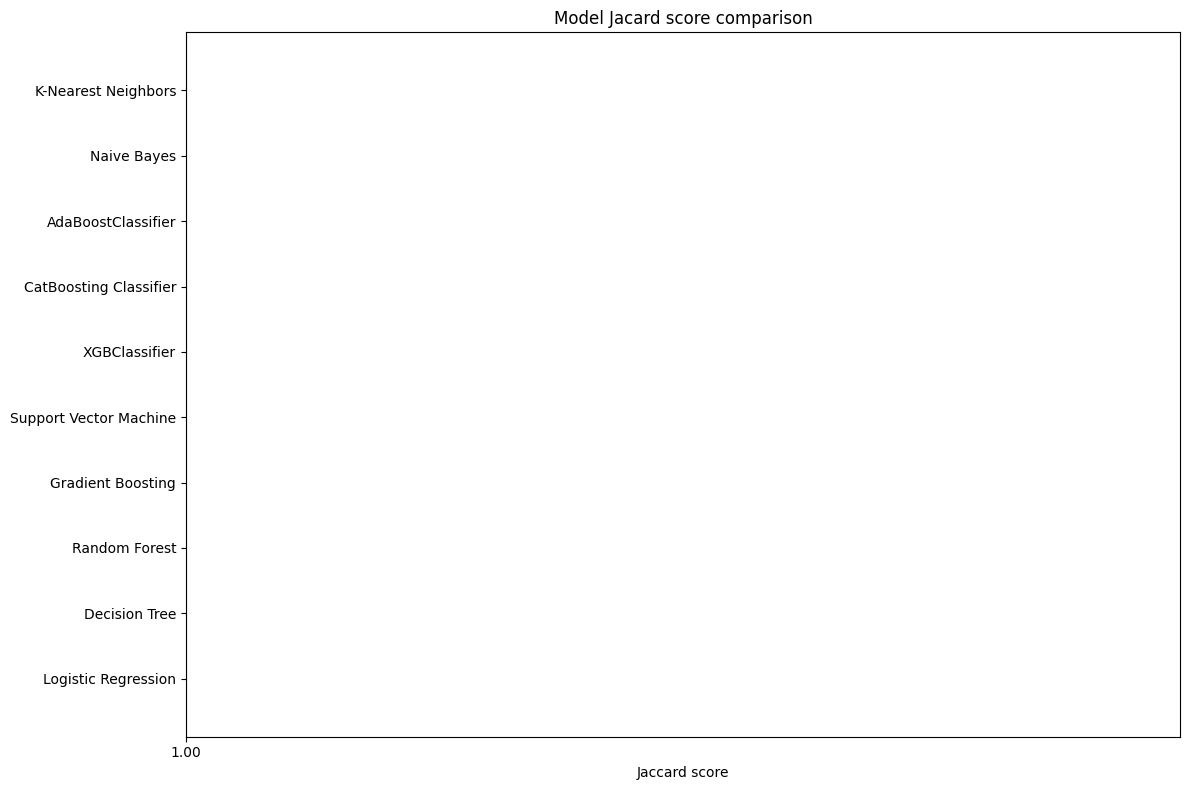

In [519]:
# Visualize Jacard Scores
plt.figure(figsize=(12, 8))
plt.barh(results_df['Model'], results_df['Jaccard score'], color='teal')
plt.xlabel('Jaccard score')
plt.title('Model Jacard score comparison')
plt.xlim(0, 1)
plt.grid(axis='x')
plt.tight_layout()
plt.show()  #As all the jacard scores are 1 we are not seeing the clear graph

## Confusion Matrix

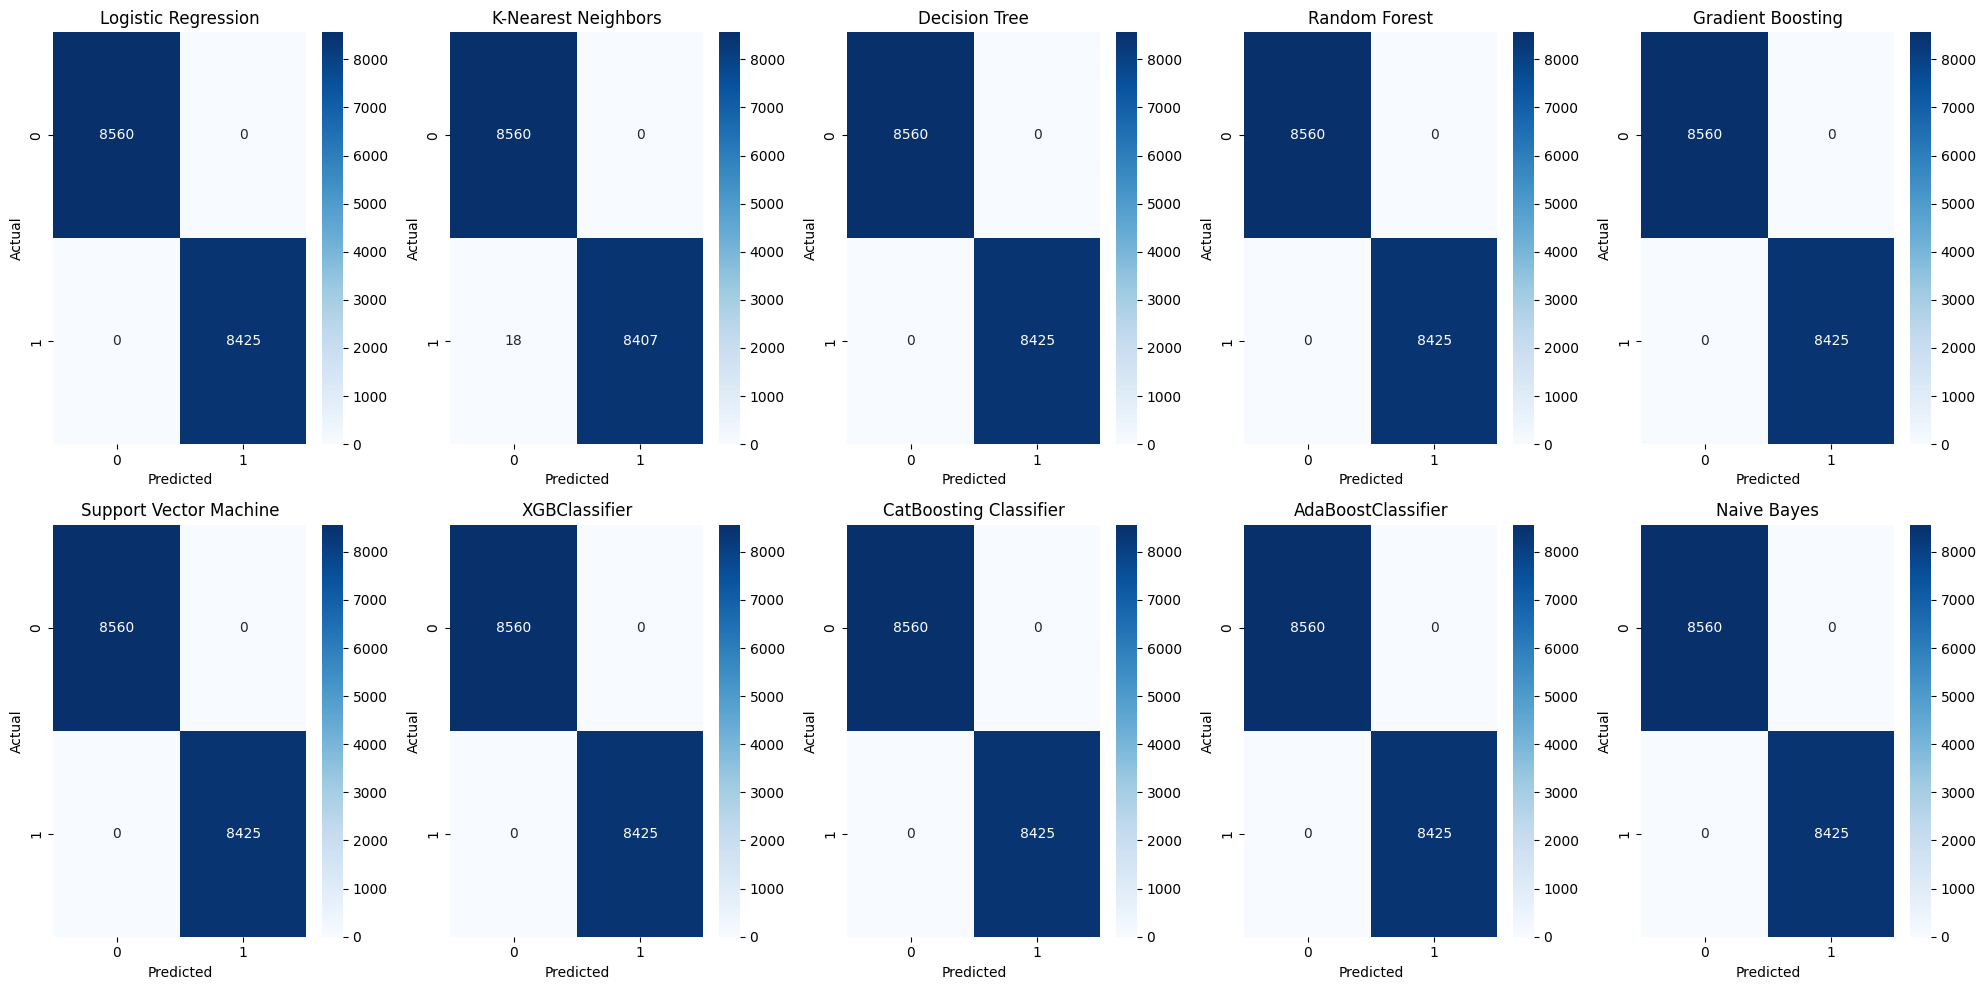

In [520]:
# Create a figure with a 2x5 grid of subplots (total 10 plots) and set the overall figure size to 20x10 inches
# - `fig`: The main figure object
# - `axes`: A 2D numpy array of Axes objects (subplots)
fig, axes = plt.subplots(2, 5, figsize=(20, 10))

# Flatten the 2D axes array into a 1D array for easier iteration
# - `axes.ravel()` converts [[ax1, ax2,...], [ax6, ax7,...]] → [ax1, ax2, ..., ax10] and these objects store the information about the subplots
axes = axes.ravel()

# Iterate over each entry in the `conf_matrices` dictionary
# - `conf_matrices`: A dictionary where keys are model names and values are confusion matrices
# - `enumerate()` adds an index counter `i` while unpacking (name, cm) pairs
for i, (name, cm) in enumerate(conf_matrices.items()):
    
    # Create a heatmap for the current confusion matrix `cm` on the i-th subplot
    sns.heatmap(
        cm,                 # Confusion matrix data (2D array)
        annot=True,         # Display numerical values in cells
        fmt='d',            # Format annotations as integers (no decimals)
        cmap='Blues',       # Use a blue color gradient (darker = higher values)
        ax=axes[i]          # Draw on the i-th subplot in the flattened axes array
    )
    
    # Set subplot title to the model name
    axes[i].set_title(name)
    
    # Label x-axis as "Predicted" (columns represent predicted classes)
    axes[i].set_xlabel('Predicted')
    
    # Label y-axis as "Actual" (rows represent true/actual classes)
    axes[i].set_ylabel('Actual')

# Adjust subplot spacing to prevent overlapping labels/titles
plt.tight_layout()

# Display the entire figure with all subplots
plt.show()